In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('train.csv')
data.describe()



,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [4]:
print(data.head(10))

   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   
5   5    11    12  Astrology: I am a Capricorn Sun Cap moon and c...   
6   6    13    14                                Should I buy tiago?   
7   7    15    16                     How can I be a good geologist?   
8   8    17    18                    When do you use シ instead of し?   
9   9    19    20  Motorola (company): Can I hack my Charter Moto...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  


In [6]:
print(data.columns)
print(data.info())

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB
None


In [13]:
null_row = data[data["question1"].isnull() | data["question2"].isnull()]
print(null_row)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [15]:
data.dropna(subset=['question1', 'question2'],inplace=True)
data.reset_index(drop=True, inplace=True)

In [16]:
print(data['is_duplicate'].value_counts())

is_duplicate
0    255024
1    149263
Name: count, dtype: int64


In [17]:
data.to_csv('quora_cleaned_train.csv', index=False)

<Axes: xlabel='is_duplicate'>

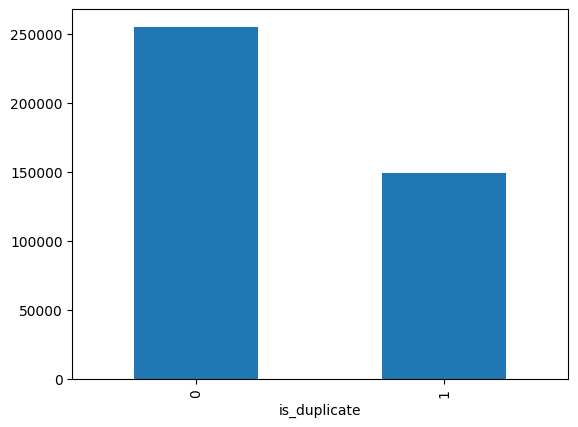

In [20]:
data.groupby("is_duplicate")['id'].count().plot.bar()

In [21]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(data['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(data['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


In [ ]:

unique_qid = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
print(len(np.unique(unique_qid)))

ques_more_one = np.sum(unique_qid.value_counts() > 1)
print(ques_more_one)
print ('Max number of times a single question is repeated: {}\n'.format(max(unique_qid.value_counts())))


537933
111780
Max number of times a single question is repeated: 157



In [12]:
all_qids = pd.concat([data['qid1'], data['qid2']], ignore_index=True)

# Count frequency of each question ID
qid_counts = all_qids.value_counts()

# Get top 5
top_5_qids = qid_counts.head(5)

# Print results
print("Top 5 question IDs with highest frequency:")
for qid, freq in top_5_qids.items():
    print(f"Question ID: {qid}, Frequency: {freq}")

Top 5 question IDs with highest frequency:
Question ID: 2559, Frequency: 157
Question ID: 30782, Frequency: 120
Question ID: 4044, Frequency: 111
Question ID: 2561, Frequency: 88
Question ID: 14376, Frequency: 79


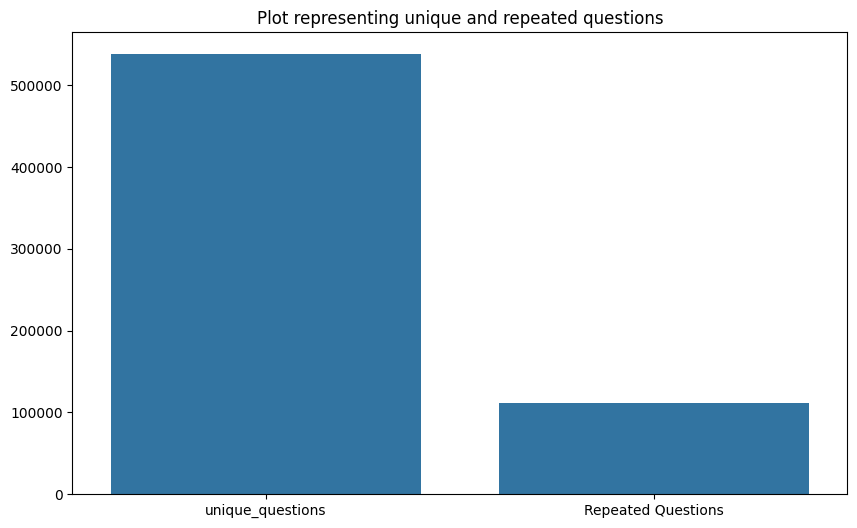

In [20]:
unique_qid = 537933
ques_more_one = 111780
x = ["unique_questions", "Repeated Questions"]
y = [unique_qid, ques_more_one]

plt.figure(figsize=(10, 6))
plt.title("Plot representing unique and repeated questions")
sns.barplot(x=x, y=y)
plt.show()


In [21]:

pair_duplicates = data[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - data.shape[0])

Number of duplicate questions 0


Maximum number of times a single question is repeated: 157

See Properly , the y-axis is in log scale


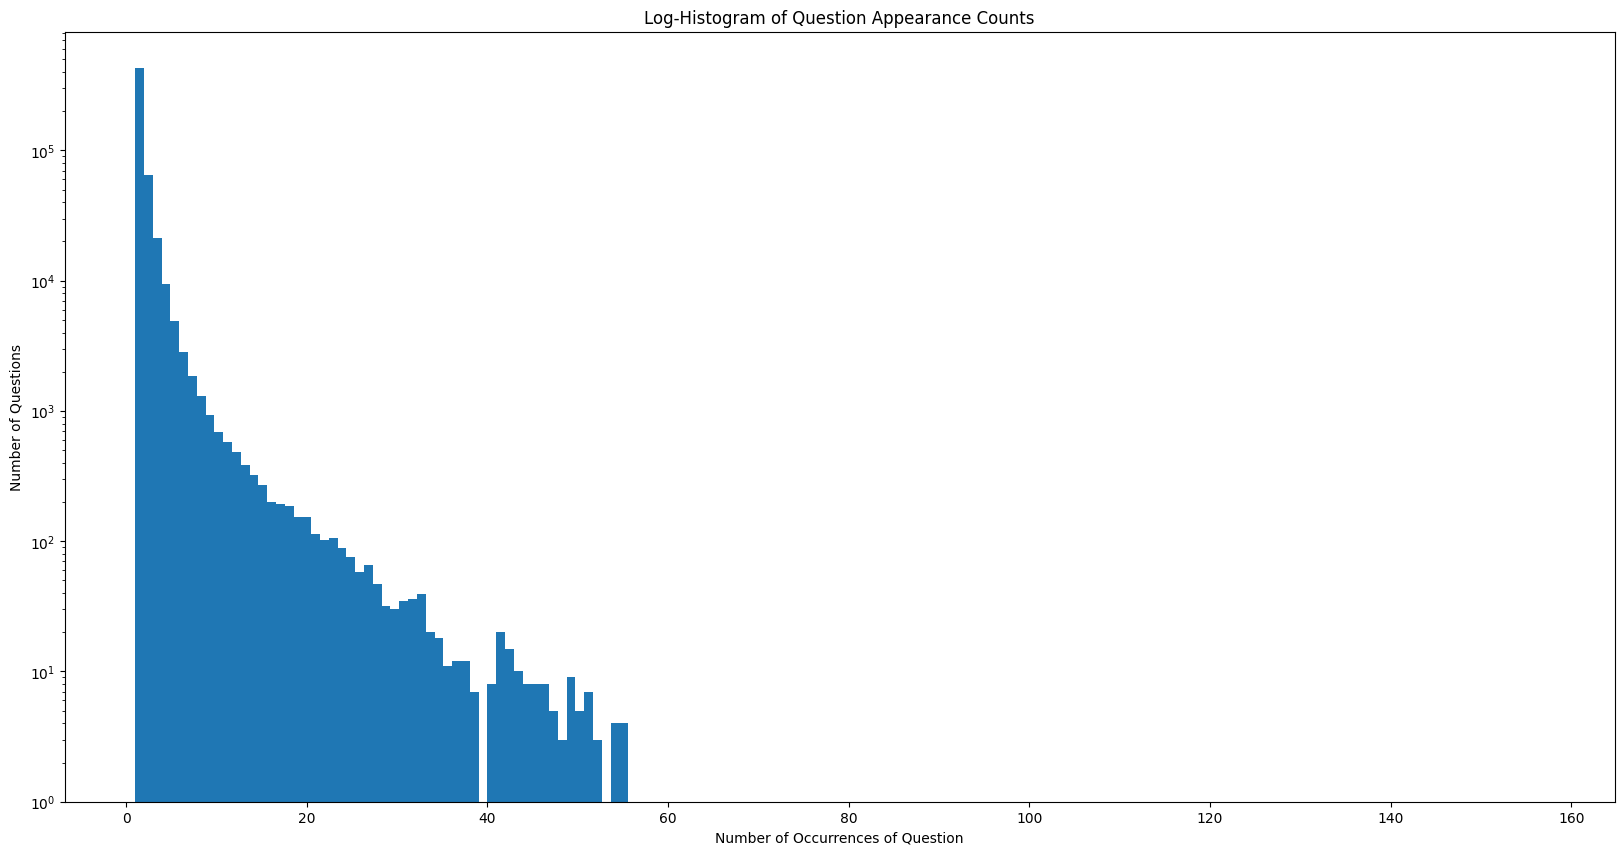

In [25]:
unique_qid = pd.Series(pd.concat([data['qid1'], data['qid2']]))

# Now plot histogram
plt.figure(figsize=(20, 10))
plt.hist(unique_qid.value_counts(), bins=160)

plt.yscale('log')
plt.ylim(bottom=1)  # avoids log(0) error
plt.title('Log-Histogram of Question Appearance Counts')
plt.xlabel('Number of Occurrences of Question')
plt.ylabel('Number of Questions')

print('Maximum number of times a single question is repeated: {}\n'.format(unique_qid.value_counts().max()))
print("See Properly , the y-axis is in log scale")


In [26]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("quora_cleaned_train.csv")

# ---------------- Feature Engineering ----------------

# Frequency of qid1 and qid2
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')

# Length of questions
df['q1len'] = df['question1'].apply(lambda x: len(str(x)))
df['q2len'] = df['question2'].apply(lambda x: len(str(x)))

# Number of words in each question
df['q1_n_words'] = df['question1'].apply(lambda x: len(str(x).split()))
df['q2_n_words'] = df['question2'].apply(lambda x: len(str(x).split()))

# Common words
df['word_Common'] = df.apply(
    lambda row: len(set(str(row['question1']).lower().split()) &
                    set(str(row['question2']).lower().split())), axis=1)

# Total unique words
df['word_Total'] = df.apply(
    lambda row: len(set(str(row['question1']).lower().split()) |
                    set(str(row['question2']).lower().split())), axis=1)

# Word share ratio
df['word_share'] = df['word_Common'] / df['word_Total']

# Sum and difference of question frequencies
df['freq_q1+q2'] = df['freq_qid1'] + df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1'] - df['freq_qid2'])

# ---------------- Save Updated Dataset ----------------
df.to_csv("quora_cleaned_train.csv", index=False)

print("✅ Feature engineering complete! New file saved as 'quora_cleaned_train.csv'")


✅ Feature engineering complete! New file saved as 'quora_cleaned_train.csv'


C:\Users\Aditya\AppData\Local\Temp\ipykernel_24876\3074827101.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_24876\3074827101.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

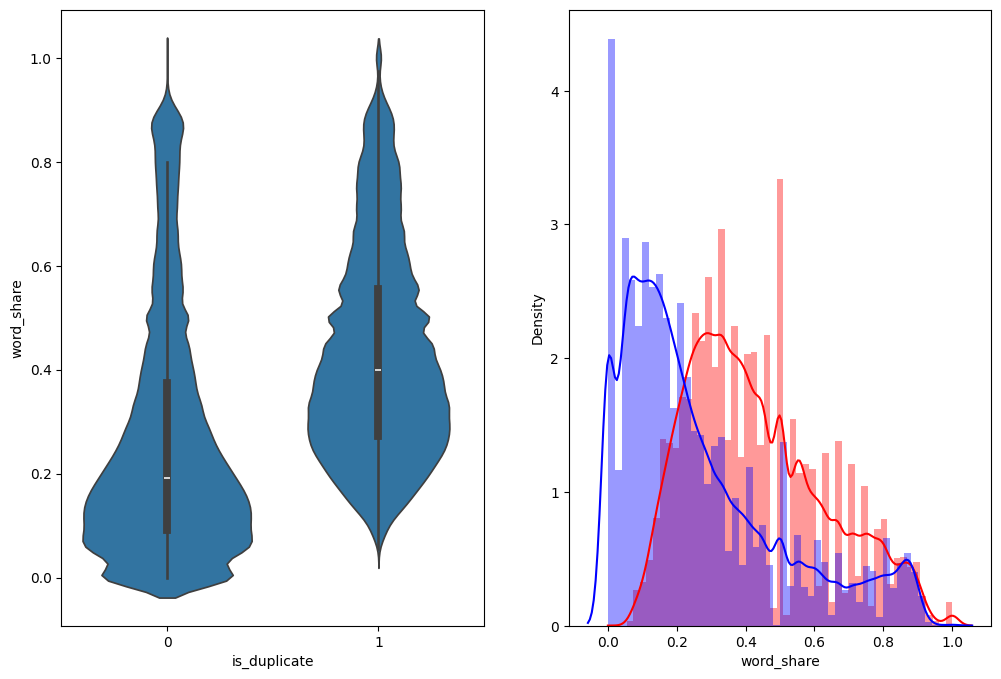

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

In [28]:
# Classify based on threshold
df['predicted_duplicate'] = df['word_share'].apply(lambda x: 1 if x > 0.5 else 0)

# Count duplicates & non-duplicates
counts = df['predicted_duplicate'].value_counts()

# Display results
print("Duplicate count (word_share > 0.5):", counts.get(1, 0))
print("Non-duplicate count (word_share <= 0.5):", counts.get(0, 0))


Duplicate count (word_share > 0.5): 82190
Non-duplicate count (word_share <= 0.5): 322097


C:\Users\Aditya\AppData\Local\Temp\ipykernel_24876\3091341030.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_24876\3091341030.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

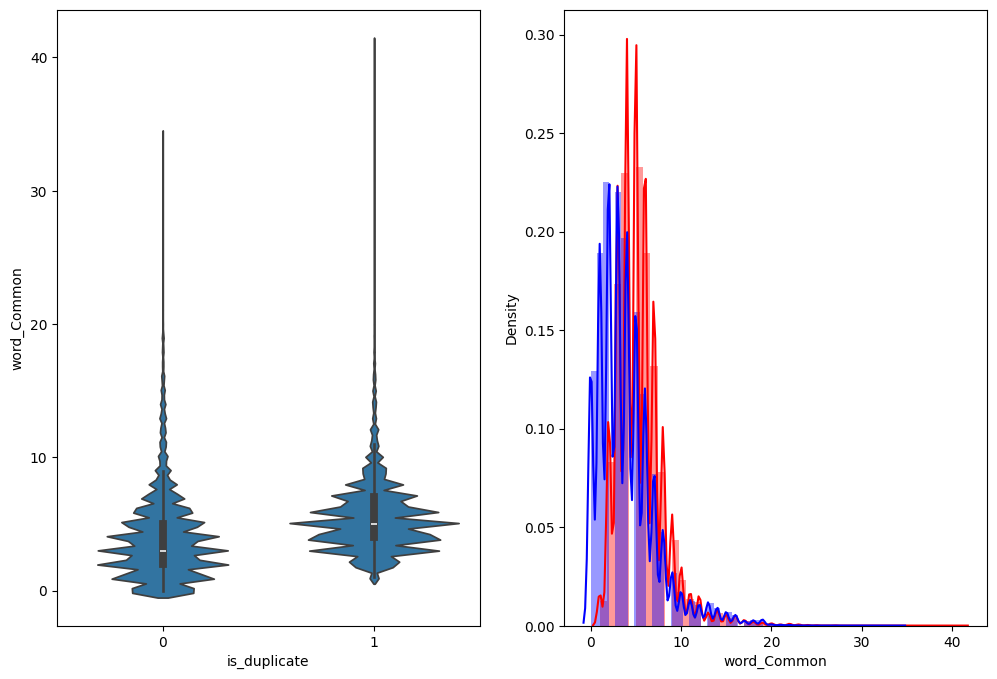

In [29]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()